# Homework1

In [1]:
# import package
import pandas as pd
import numpy as np
import missingno as msn

## Question 1

In [2]:
# Version of Pandas
print(f"Version of Pandas : {pd.__version__}")

Version of Pandas : 1.4.4


In [3]:
df = pd.read_csv("datasets_housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Question 2

In [4]:
# Size of the Dataset 
df.shape

(20640, 10)

In [5]:
print(f"Number of columns : {df.shape[1]}")

Number of columns : 10


We have 10 columns

## Question 3

<AxesSubplot:>

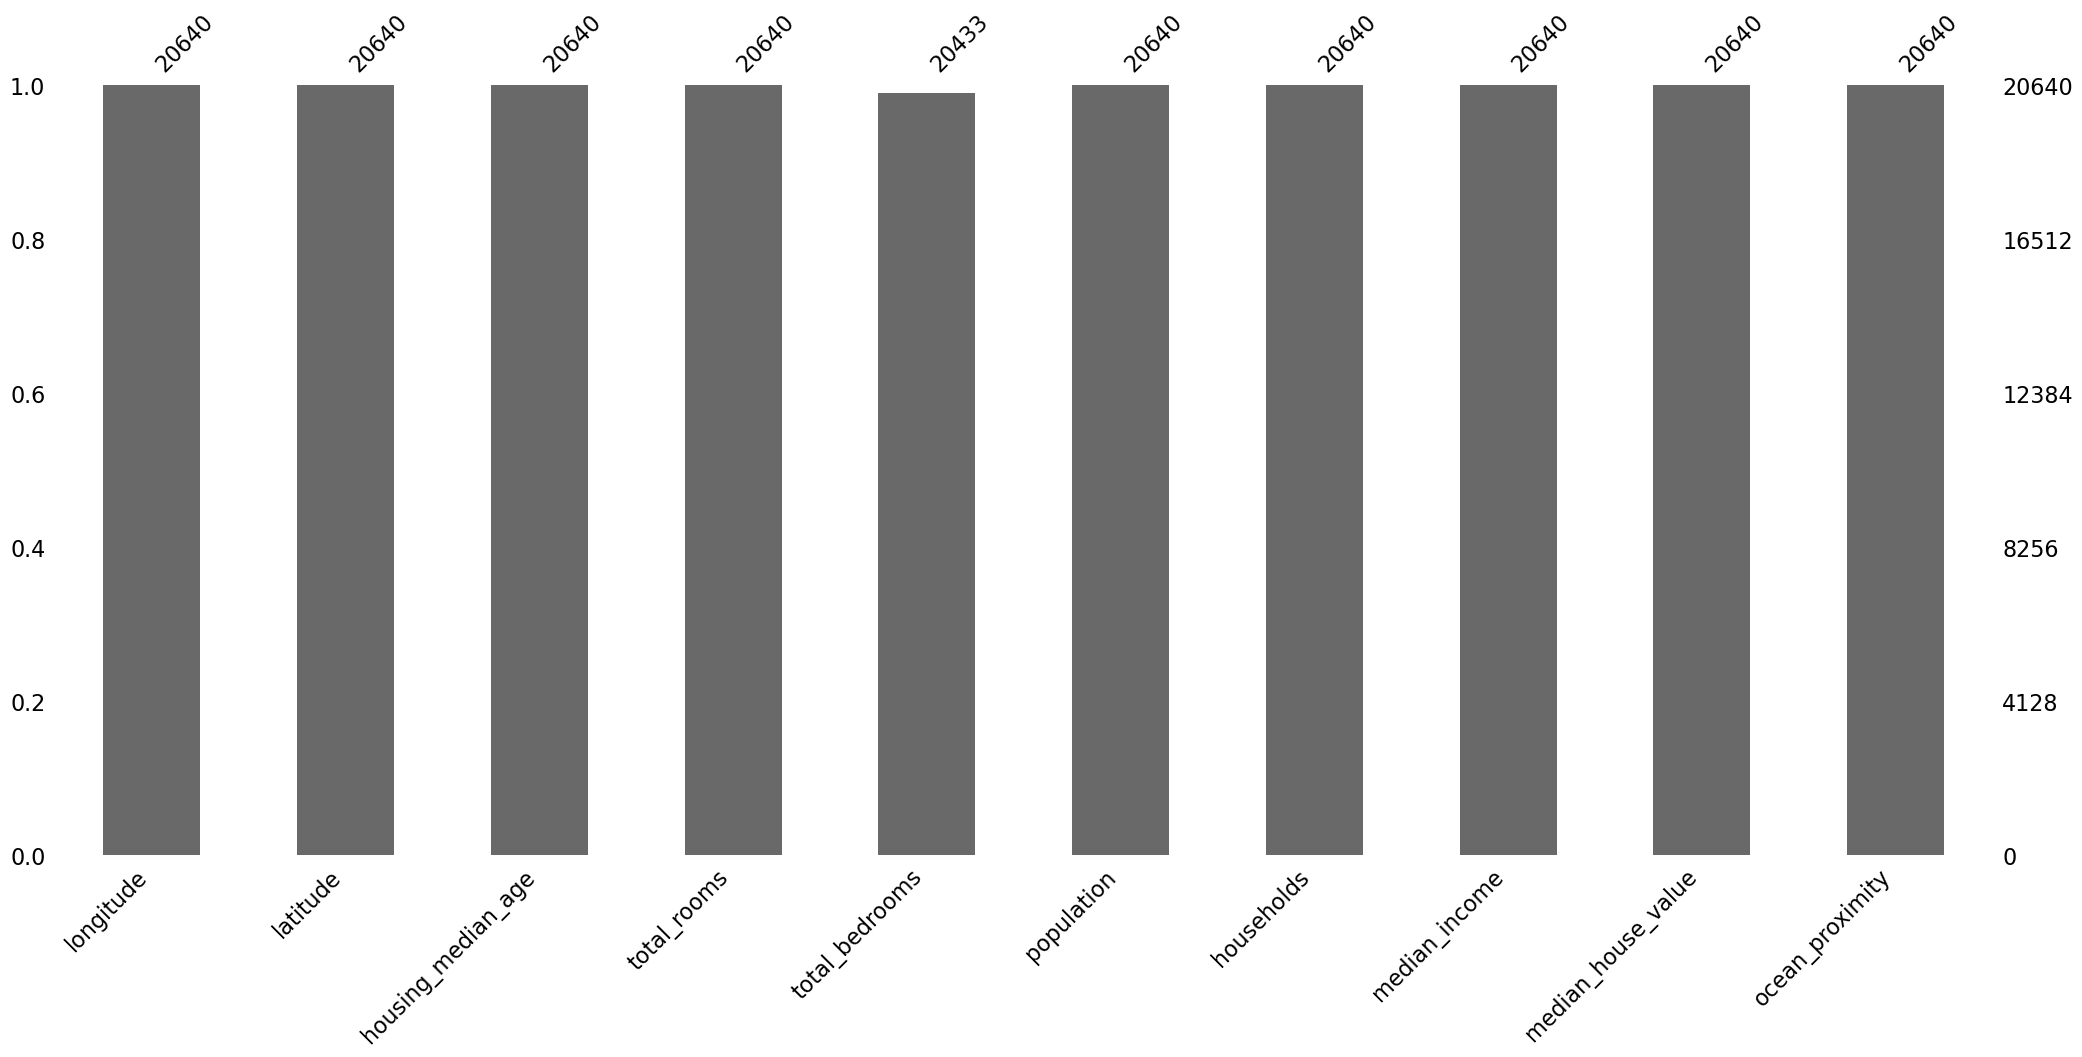

In [6]:
msn.bar(df)

In [7]:
# Missing values
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

The columns which have missing values is **total_bedrooms**

## Question 4

In [8]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [9]:
print(f"The number of unique values of the column ocean_proximity is {df['ocean_proximity'].nunique()}")

The number of unique values of the column ocean_proximity is 5


## Question 5

In [10]:
df1 = df[df["ocean_proximity"] == "NEAR BAY"]
df1.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [11]:
df1['median_house_value'].mean()

259212.31179039303

In [12]:
print(f"The average value of the median_house_value for the houses located near the bay is {round(df1['median_house_value'].mean())}")

The average value of the median_house_value for the houses located near the bay is 259212


## Question 6

### 1- Calculate the average of **total_bedrooms**

In [13]:
mean_bedrooms = df['total_bedrooms'].mean()

In [14]:
print(f"The average of the total_bedrooms column is {mean_bedrooms}")

The average of the total_bedrooms column is 537.8705525375618


### 2- Fill the missing values 

In [15]:
df_new = df.copy()
df_new['total_bedrooms'].fillna(mean_bedrooms, inplace=True)

### 3- Calculate the average of **total_bedrooms**

In [16]:
mean_bedrooms_new = df_new['total_bedrooms'].mean()

In [17]:
print(f"The average of the total_bedrooms column after fill missing value is {mean_bedrooms_new}")

The average of the total_bedrooms column after fill missing value is 537.8705525375639


## 4- Campare average before and after fill missing values 

The average is the same.

## Question 7

### 1- Select all the options located on islands.

In [18]:
df_islands = df[df["ocean_proximity"] == "ISLAND"]
df_islands.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
8314,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND
8315,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
8316,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
8317,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
8318,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND


### 2- Select only columns housing_median_age, total_rooms, total_bedrooms

In [19]:
col = ["housing_median_age", "total_rooms", "total_bedrooms"]
df_selected = df_islands[col]
df_selected.head()

,housing_median_age,total_rooms,total_bedrooms
8314,27.0,1675.0,521.0
8315,52.0,2359.0,591.0
8316,52.0,2127.0,512.0
8317,52.0,996.0,264.0
8318,29.0,716.0,214.0


In [20]:
df_selected.shape

(5, 3)

### 3- Get the underlying NumPy array

In [21]:
X = np.array(df_selected)
X

array([[  27., 1675.,  521.],
       [  52., 2359.,  591.],
       [  52., 2127.,  512.],
       [  52.,  996.,  264.],
       [  29.,  716.,  214.]])

### 4- Compute matrix-matrix multiplication between the transpose of X and X

In [22]:
XT = X.T
XT.shape

(3, 5)

In [23]:
XTX = np.dot(XT, X)
XTX

array([[9.6820000e+03, 3.5105300e+05, 9.1357000e+04],
       [3.5105300e+05, 1.4399307e+07, 3.7720360e+06],
       [9.1357000e+04, 3.7720360e+06, 9.9835800e+05]])

### 5- Compute the inverse of XTX.

In [24]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv.shape

(3, 3)

### 6- Create an array y with values [950, 1300, 800, 1000, 1300]

In [25]:
y = np.array([950, 1300, 800, 1000, 1300])
y

array([ 950, 1300,  800, 1000, 1300])

### 7- Multiply the inverse of XTX with the transpose of X, and then multiply the result by y.

In [26]:
res1 = np.dot(XTX_inv, XT)
res1.shape

(3, 5)

In [27]:
w = np.dot(res1, y)
w.shape

(3,)

### 8- The value of the last element of w

In [28]:
print(f"The last value of w is {w[-1]}")

The last value of w is 5.699229455065578
